# Modularity and Simulated annealing

**Definition**

The modularity Q of a graph is defined as follows:

$$Q= \sum_{i=1}^{n_c} \left[ \frac{l_c}{m} - \left(\frac{d_c}{2m}\right)^2 \right]$$

where:
- $n_c$ is the number of clusters
- $l_c$ the total number of edges joining vertices of cluster $c$
- $d_c$ the sum of the degrees of the vertices of cluster $c$

**Importation of necessary libraries**


In [4]:
import matplotlib.pyplot as plt
import networkx as nx
from Utils import *
from simulated_annealing import *

Our real dataset

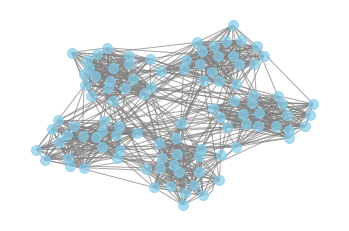

In [22]:
G = nx.relaxed_caveman_graph(5,20, 0.2, seed=None)
pos = nx.spring_layout(G)
state_pos = {n: (x, y) for n, (x,y) in pos.items()}
node_states = nx.get_node_attributes(G, 'spin')
nx.draw_networkx_labels(G, state_pos, labels=node_states, font_color='red')
nx.draw(G, pos, with_labels=False, node_size=100, node_color="skyblue", font_size=10, font_color="black", font_weight="bold", edge_color="gray", linewidths=1, alpha=0.7)
plt.show()

In [23]:
print(node_states)

{}


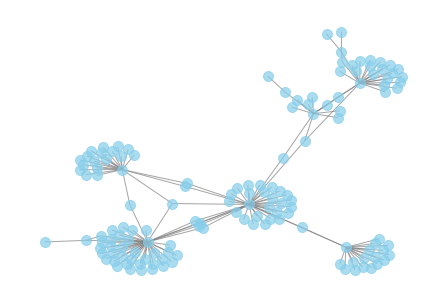

In [2]:
path="Datasets/CA-HepTh.txt"
G= nx.read_edgelist(path, comments='#',delimiter='\t')

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=False, node_size=100, node_color="skyblue", font_size=10, font_color="black", font_weight="bold", edge_color="gray", linewidths=1, alpha=0.7)
plt.show()

Finding best parameters via a grid search

In [6]:
# Appliquer la recherche en grille
iterations = 100
temperature_range = np.arange(3, 7, 1)
cooling_rate_range = temperature_range/(iterations-1)
k_range = np.arange(5, 6, 1)
best_params, best_score = grid_search(G, temperature_range, cooling_rate_range, iterations, k_range)

print("Meilleurs paramètres:", best_params)
print("Meilleur score de modularité:", best_score)

Temperature range: [3 4 5 6]
Cooling rate range: [0.03030303 0.04040404 0.05050505 0.06060606]
K range: [5]


KeyboardInterrupt: 

Final Partition: {0: 5, 1: 5, 2: 5, 3: 5, 4: 5, 5: 5, 6: 5, 7: 5, 8: 5, 9: 4, 10: 5, 11: 5, 12: 5, 13: 5, 14: 5, 15: 5, 16: 5, 17: 5, 18: 5, 19: 5, 20: 4, 21: 4, 22: 4, 23: 4, 24: 4, 25: 4, 26: 4, 27: 4, 28: 4, 29: 4, 30: 4, 31: 4, 32: 4, 33: 4, 34: 4, 35: 4, 36: 4, 37: 4, 38: 4, 39: 4, 40: 1, 41: 1, 42: 1, 43: 1, 44: 1, 45: 1, 46: 1, 47: 1, 48: 1, 49: 1, 50: 1, 51: 1, 52: 1, 53: 1, 54: 1, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 0, 61: 0, 62: 0, 63: 0, 64: 0, 65: 0, 66: 0, 67: 0, 68: 0, 69: 0, 70: 0, 71: 0, 72: 0, 73: 0, 74: 0, 75: 0, 76: 0, 77: 0, 78: 0, 79: 0, 80: 3, 81: 3, 82: 3, 83: 3, 84: 3, 85: 3, 86: 3, 87: 3, 88: 3, 89: 3, 90: 3, 91: 3, 92: 3, 93: 3, 94: 3, 95: 3, 96: 3, 97: 3, 98: 3, 99: 3}
Final Modularity Score: 0.6229994459833795


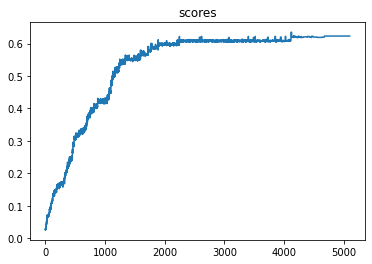

In [39]:
# # Meilleurs paramètres: {'temperature': 5, 'cooling_rate': 0.15151515151515152, 'iterations': 100, 'k': 7}
# k=best_params['k']
# temperature=best_params['temperature']
# cooling_rate=best_params['cooling_rate']
# iterations=best_params['iterations']

k=5
temperature=5
cooling_rate=0.15151515151515152
iterations=50


initial_partition = {node: random.randint(0,k) for node in G.nodes()}

# Appliquer le Simulated Annealing
final_partition, final_score, scores = simulated_annealing(G, initial_partition, temperature, cooling_rate, iterations)

print("Final Partition:", final_partition)
print("Final Modularity Score:", final_score)


plt.plot(scores)
plt.title("scores")
plt.show()

In [40]:
set(final_partition.values())

{0, 1, 3, 4, 5}

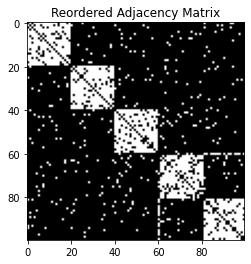

In [41]:
plot_adj(G,final_partition)

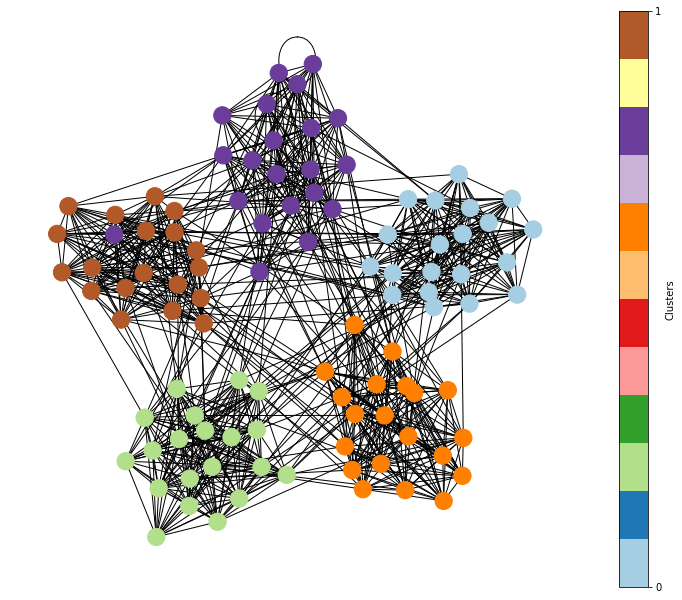

In [42]:
plot_graph(G,final_partition)